#Exploratory Data

In [1]:
# import all library we need
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [2]:
# mount our personal drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read dataset 
df = pd.read_csv('/content/drive/MyDrive/customerService/twcs/twcs.csv')

# df = pd.read_csv('/content/drive/My Drive/customerService/twcs/twcs.csv') #Aul

In [4]:
# Checking at a glance
# Tweets have been formed by text from two or more people marked by where the NaN value of response_tweet_id(as end) and NaN value of in_response_to_tweet_id(as start)
# tweet_id is identity number of text, author_id is the author of the text,  inbound relate true input into cs false reply from cs, response_tweet_id relate to what text(s) after it, in_response_to_tweet_id relate to what tweet(s) before it.
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [5]:
# Checking at a glance
df[5:15]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0
10,16,115713,True,Tue Oct 31 20:00:43 +0000 2017,@sprintcare Since I signed up with you....Sinc...,15,17.0
11,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN
13,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN


In [6]:
# Checking at a glance
df[15:35]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
15,21,Ask_Spectrum,False,Tue Oct 31 22:14:37 +0000 2017,@115716 What information is incorrect? ^JK,"22,23",24.0
16,22,115716,True,Tue Oct 31 22:16:48 +0000 2017,@Ask_Spectrum Would you like me to email you a...,25,21.0
17,25,Ask_Spectrum,False,Tue Oct 31 22:18:28 +0000 2017,@115716 Our department is part of the corporat...,26,22.0
18,26,115716,True,Tue Oct 31 22:19:56 +0000 2017,@Ask_Spectrum I received this from your corpor...,27,25.0
19,27,Ask_Spectrum,False,Tue Oct 31 22:21:26 +0000 2017,@115716 No thank you. ^JK,NaN,26.0
20,23,115716,True,Tue Oct 31 22:16:05 +0000 2017,@Ask_Spectrum The correct way to do it is via ...,NaN,21.0
21,24,115716,True,Tue Oct 31 22:13:02 +0000 2017,@Ask_Spectrum That is INCORRECT information I ...,21,28.0
22,28,Ask_Spectrum,False,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...,24,29.0
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN
24,30,Ask_Spectrum,False,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio...",NaN,31.0


In [7]:
# checking data entries, memory usage, and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [8]:
#Converting to datetime format
df["created_at"]= pd.to_datetime(df["created_at"])

In [9]:
# checking data entries, memory usage, and data type after formatting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   tweet_id                 int64              
 1   author_id                object             
 2   inbound                  bool               
 3   created_at               datetime64[ns, UTC]
 4   text                     object             
 5   response_tweet_id        object             
 6   in_response_to_tweet_id  float64            
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 131.4+ MB


In [10]:
# checking formatted created_at as YYYY-MM-DD TIME
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0


In [11]:
# checking isnull data
df.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [12]:
#check duplicate
df.duplicated().sum()

0

In [13]:
# list all unique value of inbound
np.unique(df["inbound"])

array([False,  True])

false means tweet from customer service agent and true tweets from customer

In [14]:
ai = np.unique(df["author_id"])

In [15]:
# checking unique value of author_id
np.count_nonzero(ai)

702777

In [16]:
# sorted by time
df_new = df.sort_values("created_at",ascending=False)

In [17]:
df_new.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
524147,589938,259493,True,2017-12-03 23:14:01+00:00,@GWRHelp @259492 @259491 I think the confusion...,NaN,589937.0
533916,600365,AmazonHelp,False,2017-12-03 23:13:02+00:00,@220550 Hi there! Please click the link given ...,NaN,600364.0
537388,603932,AmazonHelp,False,2017-12-03 23:13:00+00:00,@263540 Je vous prie dans ce cas-là de le sign...,NaN,603933.0
531793,597923,AmazonHelp,False,2017-12-03 23:13:00+00:00,"@261758 When you contacted us, what options/in...",NaN,597922.0
537559,604104,AskPayPal,False,2017-12-03 23:12:50+00:00,@263599 Sorry to hear this. If you would like ...,NaN,604105.0


In [18]:
df_new[1:78]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
533916,600365,AmazonHelp,False,2017-12-03 23:13:02+00:00,@220550 Hi there! Please click the link given ...,NaN,600364.0
537388,603932,AmazonHelp,False,2017-12-03 23:13:00+00:00,@263540 Je vous prie dans ce cas-là de le sign...,NaN,603933.0
531793,597923,AmazonHelp,False,2017-12-03 23:13:00+00:00,"@261758 When you contacted us, what options/in...",NaN,597922.0
537559,604104,AskPayPal,False,2017-12-03 23:12:50+00:00,@263599 Sorry to hear this. If you would like ...,NaN,604105.0
536036,602562,XboxSupport,False,2017-12-03 23:12:44+00:00,"@263050 According to https://t.co/Qlgzk9sJUt, ...",NaN,602560.0
...,...,...,...,...,...,...,...
535718,602240,262956,True,2017-12-03 23:04:08+00:00,"@AmazonHelp I have done this many times, alrea...",NaN,602239.0
537629,604180,ATVIAssist,False,2017-12-03 23:04:01+00:00,@263625 Hey there! Please leave all feedback a...,NaN,604181.0
537416,603959,AmazonHelp,False,2017-12-03 23:04:00+00:00,@263548 If you don't see a membership here: ht...,NaN,603960.0
537495,604036,hulu_support,False,2017-12-03 23:03:52+00:00,@263574 Hey Patrick! We can't make any promise...,NaN,604037.0


#Data Preprocessing

In [19]:
# What author_id we want to consider their conversation from sample.csv 
only_105860 = df_new[df_new["author_id"].isin(["105860"])]

only_105860.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id


In [20]:
# random from dataset != with sample.csv
only_259493 = df_new[df_new["author_id"].isin(["259493"])]

only_259493.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
524147,589938,259493,True,2017-12-03 23:14:01+00:00,@GWRHelp @259492 @259491 I think the confusion...,NaN,589937.0
2064927,2224070,259493,True,2017-11-10 13:13:20+00:00,@115793 @SW_Help Approaching sunset at Clapham...,"2224069,2224071",NaN
1876542,2032563,259493,True,2017-11-07 15:56:37+00:00,@SW_Help OK thanks. And will I be ok using my ...,2032565,2032562.0
1876544,2032564,259493,True,2017-11-07 15:30:44+00:00,"@SW_Help Hi, could you confirm whereabouts in ...",2032562,NaN
1812757,1968331,259493,True,2017-10-18 18:04:35+00:00,@SW_Help @330583 The 1759 you were waiting for...,NaN,1968330.0


In [21]:
#firstly, upload data to file
sample = pd.read_csv('/content/drive/MyDrive/customerService/sample.csv')
only_105860_sample = sample[sample["author_id"].isin(["105860"])]
only_105860_sample

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
89,119331,105860,True,Wed Oct 11 13:47:14 +0000 2017,They reschedule my shit for tomorrow https://t...,119330,NaN


In [22]:
# data preprocessing
str_punc = string.punctuation.replace(',', '').replace("'",'')#no need any punctuation

def cleaningdata(text):
    global str_punc
    text = re.sub(r'[^a-zA-Z, ' ']','',text)#regular expression [^a-zA-Z] means any character that IS NOT a-z OR A-Z will be removed
    text = text.lower() # making text in lower formatted
    return text    

In [23]:
# Read dataset & Preprocess text
df_train = pd.read_csv('/content/drive/MyDrive/customerService/train_data.csv', sep=',')
df_val = pd.read_csv('/content/drive/MyDrive/customerService/val_data.csv', sep=',')
df_test = pd.read_csv('/content/drive/MyDrive/customerService/test_data.csv', sep=',')
# from challenge NLP we convert to sentiment analysis(positive,nehative and neutral)
df_train['emotions'] = df_train['emotions'].replace(['joy','love'],'positive').replace(['anger','fear','sadness'],'negative').replace(['surprise'],'neutral')
df_val['emotions'] = df_val['emotions'].replace(['joy','love'],'positive').replace(['anger','fear','sadness'],'negative').replace(['surprise'],'neutral')
df_test['emotions'] = df_test['emotions'].replace(['joy','love'],'positive').replace(['anger','fear','sadness'],'negative').replace(['surprise'],'neutral')
# applying alphabetical(a-Z) function to our data target
X_train = df_train['text'].apply(cleaningdata)
y_train = df_train['emotions']

X_test = df_test['text'].apply(cleaningdata)
y_test = df_test['emotions']

X_val = df_val['text'].apply(cleaningdata)
y_val = df_val['emotions']

In [24]:
# data train 80%
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      368 non-null    object
 1   emotions  368 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB


In [25]:
# data test 10%
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      46 non-null     object
 1   emotions  46 non-null     object
dtypes: object(2)
memory usage: 864.0+ bytes


In [26]:
# data validation 10%
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      47 non-null     object
 1   emotions  47 non-null     object
dtypes: object(2)
memory usage: 880.0+ bytes


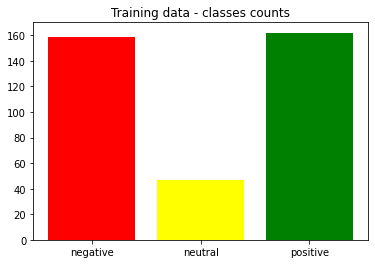

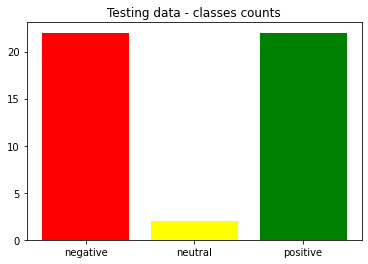

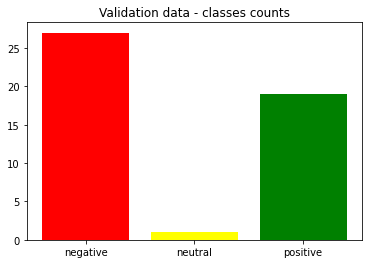

In [27]:
# Visualize classes counts
colors = np.array(["red", "yellow","green"])
# train:val:test = 0.8:0.1:0.1
unique_1, counts_1 = np.unique(y_train, return_counts=True)
plt.bar(unique_1,counts_1, color=colors)
plt.title("Training data - classes counts")
plt.show()
unique_2, counts_2 = np.unique(y_test, return_counts=True)
plt.bar(unique_2, counts_2, color=colors)
plt.title("Testing data - classes counts")
plt.show()
unique_3, counts_3 = np.unique(y_val, return_counts=True)
plt.bar(unique_3, counts_3, color=colors)
plt.title("Validation data - classes counts")
plt.show()

In [28]:
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

# let the rehshape function determine a dimension of row data that has only 1 column
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [29]:
# Tokenize words by adding a predicted new word as a out of vocabulary
# return a list after breaking the given string by space ' '
vocabSize = 500 # custom value
tokenizer = Tokenizer(num_words=vocabSize, split=' ', oov_token="<OOV>")
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))
# applying tokenizer on our sample data
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)
# making our text uniform
X_train = pad_sequences(sequences_train, maxlen=256, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=256, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=256, truncating='pre')

# count our vocab
vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 1899


# Model

In [30]:
# Build neural network architecture
import tensorflow as tf

# Parameters
embedding_dim =3 #only 3 labels
lstm_dim = 2 #custom value by try and error
# tokenizer.num_words = vocabsize + 1

# Model Definition with LSTM
model_sa = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.num_words, embedding_dim, input_length=X_train.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model_sa.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 3)            1500      
                                                                 
 bidirectional (Bidirectiona  (None, 4)                96        
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 1,611
Trainable params: 1,611
Non-trainable params: 0
_________________________________________________________________


#Compile

In [31]:
# Set the training parameters
model_sa.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

# Fit Data

In [32]:
# Fit the model
history_lstm = model_sa.fit(X_train,y_train,epochs=50,validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
12/12 - 6s - loss: 1.0965 - accuracy: 0.3859 - val_loss: 1.0757 - val_accuracy: 0.5652 - 6s/epoch - 524ms/step
Epoch 2/50
12/12 - 1s - loss: 1.0748 - accuracy: 0.4674 - val_loss: 1.0496 - val_accuracy: 0.4783 - 1s/epoch - 117ms/step
Epoch 3/50
12/12 - 1s - loss: 1.0608 - accuracy: 0.4185 - val_loss: 1.0258 - val_accuracy: 0.4783 - 1s/epoch - 119ms/step
Epoch 4/50
12/12 - 1s - loss: 1.0513 - accuracy: 0.4402 - val_loss: 1.0008 - val_accuracy: 0.4783 - 1s/epoch - 118ms/step
Epoch 5/50
12/12 - 1s - loss: 1.0334 - accuracy: 0.4266 - val_loss: 0.9802 - val_accuracy: 0.4783 - 1s/epoch - 114ms/step
Epoch 6/50
12/12 - 1s - loss: 1.0249 - accuracy: 0.4484 - val_loss: 0.9595 - val_accuracy: 0.4783 - 1s/epoch - 114ms/step
Epoch 7/50
12/12 - 1s - loss: 1.0144 - accuracy: 0.4293 - val_loss: 0.9430 - val_accuracy: 0.4783 - 1s/epoch - 116ms/step
Epoch 8/50
12/12 - 1s - loss: 0.9952 - accuracy: 0.4674 - val_loss: 0.9312 - val_accuracy: 0.4783 - 1s/epoch - 120ms/step
Epoch 9/50
12/12 - 1s - 

# Evaluate Model

In [33]:
# evaluate trained model
model_sa.evaluate(X_val, y_val, verbose=1)

2/2 [==============================] - 0s 23ms/step - loss: 0.7954 - accuracy: 0.7872


[0.7954272031784058, 0.7872340679168701]

# Plot Loss

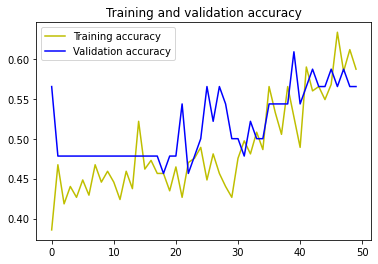

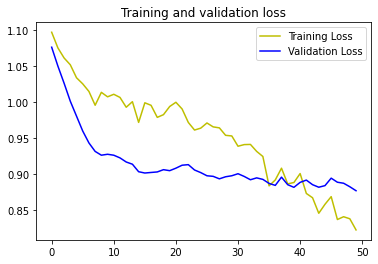

In [34]:
# Plott Loss & Accuracy
%matplotlib inline
acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Predict Conversation from Tweets

In [46]:
# X_test for predicting sample
predictions = model_sa.predict(X_test, steps = 1, verbose =2)

1/1 - 1s - 828ms/epoch - 828ms/step


In [47]:
#[negative, neutral, positive]
predictions

array([[0.38015002, 0.2749314 , 0.34491855],
       [0.39929926, 0.04282904, 0.55787176],
       [0.41083384, 0.12687798, 0.4622881 ],
       [0.43570068, 0.1849593 , 0.37934008],
       [0.42053097, 0.22428954, 0.3551795 ],
       [0.4226653 , 0.24538928, 0.33194533],
       [0.38001457, 0.07536457, 0.5446209 ],
       [0.416769  , 0.26454744, 0.31868356],
       [0.45953876, 0.17067377, 0.3697874 ],
       [0.37931064, 0.07307929, 0.5476101 ],
       [0.4928735 , 0.15588243, 0.35124406],
       [0.37596682, 0.04424593, 0.57978725],
       [0.41203547, 0.11827704, 0.46968752],
       [0.35178918, 0.05380817, 0.59440273],
       [0.42085558, 0.19045798, 0.3886864 ],
       [0.3394952 , 0.06361208, 0.5968927 ],
       [0.43159467, 0.09632389, 0.47208145],
       [0.403936  , 0.05493788, 0.5411261 ],
       [0.39268982, 0.04027661, 0.5670336 ],
       [0.39089617, 0.09919211, 0.5099117 ],
       [0.39166424, 0.30854362, 0.29979223],
       [0.44686705, 0.24392588, 0.30920705],
       [0.

In [52]:
np.savetxt('sample.csv', predictions, delimiter=",")